2023-03-20 16:50:34.747415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/asano/jaxman/.venv/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2023-03-20 16:50:34.777337: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-20 16:50:35.402352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/asano/jaxman/.venv/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2023-03-20 16:50:35.402454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library

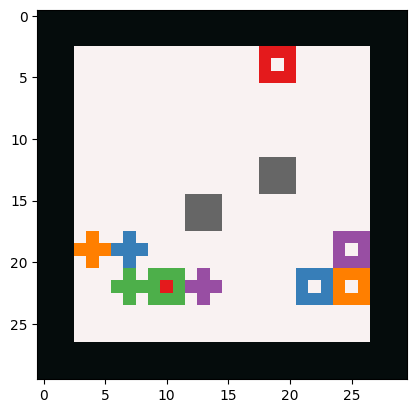

In [1]:
import hydra
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
from omegaconf import OmegaConf
from jaxman.env.pick_and_delivery.env import JaxPandDEnv
from jaxman.utils import compute_agent_action
from jaxman.utils import compute_agent_action
from jaxman.planner.rl_planner.agent.dqn.dqn import create_dqn_agent
from flax.training import checkpoints
config = hydra.utils.instantiate(OmegaConf.load("../scripts/config/env/pick_and_delivery/grid.yaml"))
model_config = hydra.utils.instantiate(OmegaConf.load("../scripts/config/model/dqn.yaml"))
config.level=0
config.map_size=10
config.num_agents=2
config.num_items=5
config.is_decay_reward=False
config.is_biased_sample=True
config.use_hold_item_info=True
env = JaxPandDEnv(config)
key = jax.random.PRNGKey(0)

plt.imshow(env.render())

In [111]:
agent, key = create_dqn_agent(env.observation_space, env.act_space, model_config, key)
actor = agent.actor
actor = checkpoints.restore_checkpoint(
    ckpt_dir="../model/pick_and_delivery_random/",
    target=actor,
    prefix="grid_actor_single",
)

In [3]:
ACTION_DICT = {
    "STAY": 0,
    "RIGHT": 1,
    "LEFT": 2,
    "DOWN": 3,
    "UP": 4,
    "LOAD": 5,
    "UNLOAD": 5,
}

stay, right, left, down, up, load/unload
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]
rew:[0.], act:[1], done:[False]


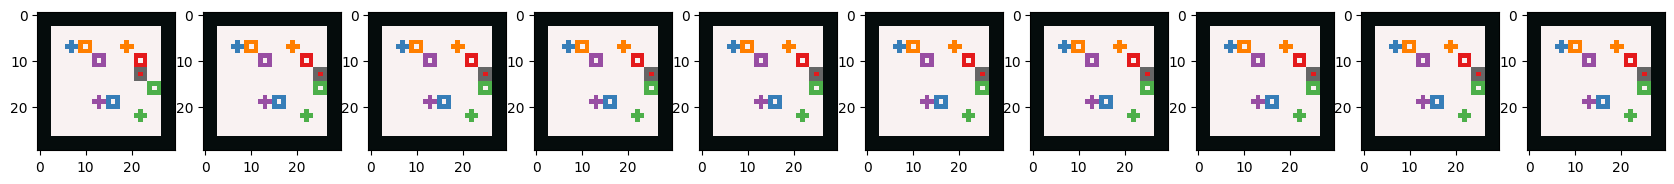

In [12]:
key, subkey = jax.random.split(key)
obs = env.reset(subkey)

is_item_loaded = jnp.expand_dims(jnp.arange(env.num_items) < env.num_agents, -1)
item_starts = (env.task_info.item_starts + is_item_loaded * 10000).astype(int)
env.state = env.state._replace(load_item_id=jnp.arange(env.num_agents), item_pos = item_starts)
fig, axes = plt.subplots(1, 10, figsize=(21, 3))
print("stay, right, left, down, up, load/unload")
for i in range(10):
    key, subkey = jax.random.split(key)
    #compute agent action
    obs = obs.split_observation()
    q_value = actor.apply_fn({"params":actor.params}, obs)
    actions = jnp.argmax(q_value,axis=-1)
    # print(f"q_value:{q_value[0]} max_q_value:{jnp.max(q_value)}")
    # print(f"probability:{q_value[0]/jnp.sum(q_value)}")

    # actions = jax.random.choice(subkey, 6, (config.num_agents,))
    actions = compute_agent_action(["RIGHT"])
    obs, rew, done, trial_info = env.step(actions)
    print(f"rew:{rew}, act:{actions}, done:{done}")
    axes[i].imshow(env.render())

# _observe(state, task_info, trial_info)

[[[0 0 0 0]
  [1 8 7 9]]

 [[0 0 0 0]
  [1 8 7 9]]]


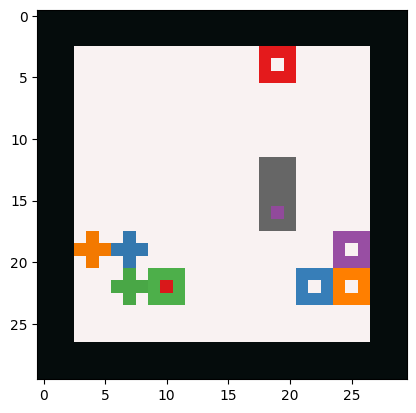

In [10]:
actions = jnp.array([0,5], dtype=int)
# fig, axes = plt.subplots(1, 10, figsize=(21, 3))
# for i in range(10):
# actions = compute_agent_action(["STAY"])
obs, rew, done, trial_info = env.step(actions)
# print(f"rew:{rew}, act:{actions}, done:{done},")
print(obs.hold_item_info)
# print(f"item info:{obs.item_

plt.imshow(env.render())